In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Get the current working directory
current_path = os.getcwd()
# Get the parent directory
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)

Parent Directory: /home/anibal/roman_rubin


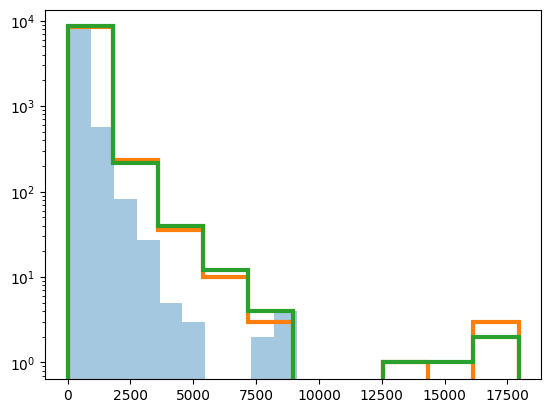

In [2]:
path= parent_directory+'/all_results/BH/results/'
true = pd.read_csv(path+'true_ffp.csv')
fit_rr = pd.read_csv(path+'fit_rr_ffp.csv')
fit_roman = pd.read_csv(path+'fit_roman_ffp.csv')

plt.hist(true['te'],alpha=0.4)
plt.hist(fit_rr['te'], histtype='step',lw=3)
plt.hist(fit_roman['te'], histtype='step',lw=3)
plt.yscale('log')

In [3]:
# plt.hist(fit_rr['chi2'],bins=30)
# plt.yscale('log')

In [4]:
met_1_rr = pd.DataFrame(columns = true.columns)
met_1_roman= pd.DataFrame(columns = true.columns)
met_2_rr = pd.DataFrame(columns = true.columns)
met_2_roman= pd.DataFrame(columns = true.columns)
met_3_rr = pd.DataFrame(columns = true.columns)
met_3_roman= pd.DataFrame(columns = true.columns)
err_ratio= pd.DataFrame(columns = true.columns)
residuals_ratio= pd.DataFrame(columns = true.columns)

err_ratio['Source'] = true['Source']
residuals_ratio['Source'] = true['Source']
met_1_roman['Source'] = true['Source']
met_1_rr['Source'] = true['Source']
met_2_roman['Source'] = true['Source']
met_2_rr['Source'] = true['Source']
met_3_roman['Source'] = true['Source']
met_3_rr['Source'] = true['Source']

keys = ['t0','u0','te','piEN','piEE','piE']

for key in keys:
    met_1_rr[key] = abs(true[key]-fit_rr[key])/true[key]
    met_1_roman[key] = abs(true[key]-fit_roman[key])/true[key]
    met_2_rr[key] = abs(true[key]-fit_rr[key])/fit_rr[key+'_err']
    met_2_roman[key] = abs(true[key]-fit_roman[key])/fit_roman[key+'_err']
    met_3_rr[key] = abs(fit_rr[key+'_err']/fit_rr[key])
    met_3_roman[key] = abs(fit_roman[key+'_err']/fit_roman[key])
    err_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']
    residuals_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']

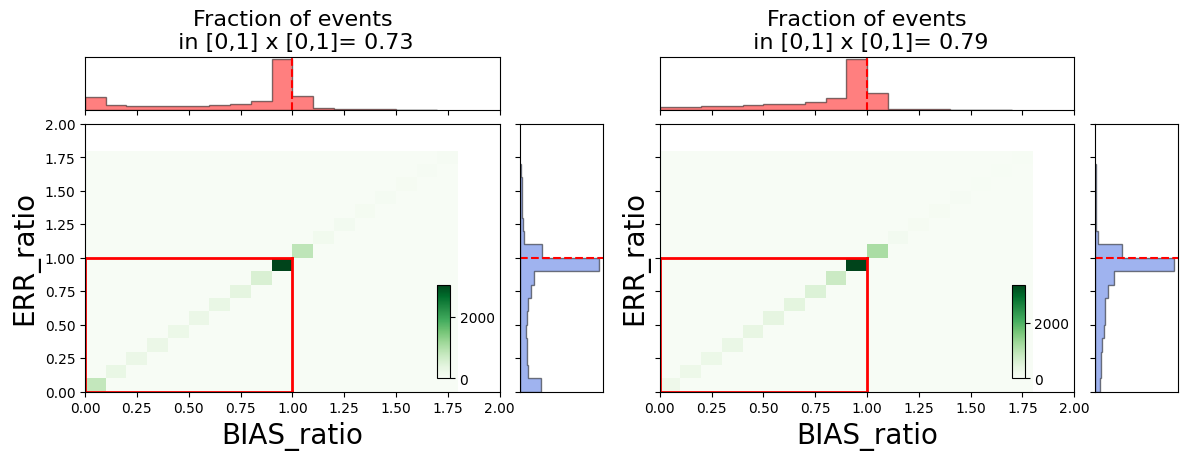

In [5]:

def create_hist2d_with_marginals(ax, x, y, labels, p, first_col=False):

    tex_label = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}
    # Main scatter plot
    hb = ax.hist2d(x, y, bins=(np.arange(0, 1.9, 0.1), np.arange(0, 1.9, 0.1)), cmap='Greens')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # Create inset axes for the histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

    # Histogram settings
    binwidth = 0.1
    ax_histx.hist(x, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
    ax_histy.hist(y, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')

    # Remove ticks from inset histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", left=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
    # ax_histy.set_yscale("log")
    # Add vertical and horizontal lines
    ax_histx.axvline(1, color='red', ls='--')
    ax_histy.axhline(1, color='red', ls='--')
    ax.axvline(1, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axvline(0, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axhline(0, xmin=0, xmax=0.5, lw=2, color='red')
    ax.axhline(1, xmin=0, xmax=0.5, lw=2, color='red')

    # Set labels with LaTeX formatting
    # label_m1 = lambda p: r'$\frac{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{RR}}{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{R}}$'
    # label_m2 = r'$\frac{\sigma_{RR}}{\sigma_{Roman}}$'
    labelx, labely =labels[0],labels[1]
    ax.set_xlabel(labelx, fontsize=20)
    
    # ax.set_xlabel("a",fontsize=20)
    # if first_col:
    ax.set_ylabel(labely, fontsize=20)

    # Add a colorbar inside the main plot
    cax = ax.inset_axes([0.85, 0.05, 0.03, 0.35], transform=ax.transAxes)
    cbar = plt.colorbar(hb[3], cax=cax, orientation='vertical')
    # cax.set_yticks([0, 50, 1000])
    # cax.set_yticklabels([0, 100, 2000], fontsize=8)
    x_min=0
    x_max=1
    y_min=0
    y_max=1
    fil_x= x[(y<1)&(y>0)]
    filtered=fil_x[(fil_x<1)&(fil_x>0)]

    number_in_square = len(filtered)/len(y)
    text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
    ax.set_title(text, fontsize = 16)

# Example usage
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1]})
x = residuals_ratio['te']
y = err_ratio['te']
# x2 = residuals_ratio['rho']
# y2 = err_ratio['rho']
x3 = residuals_ratio['piE']
y3 = err_ratio['piE']
# print(x3)

create_hist2d_with_marginals(axes[0], x, y, ["BIAS_ratio","ERR_ratio"], 'te', first_col=True)
# create_hist2d_with_marginals(axes[1], x2, y2, ["BIAS_ratio","ERR_ratio"], 'rho')
create_hist2d_with_marginals(axes[1], x3, y3, ["BIAS_ratio","ERR_ratio"], 'piE')

plt.tight_layout()
plt.show()

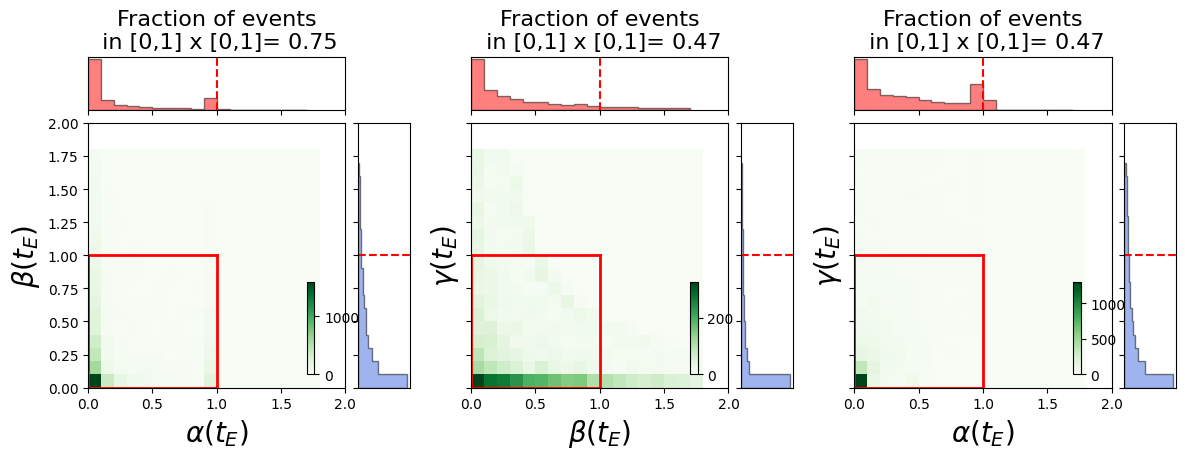

In [6]:

# Example usage
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1, 1]})
x = met_1_rr['te']
y = met_2_rr['te']
x2 = met_2_rr['te']
y2 = met_3_rr['te']
x3 = met_1_rr['piE']
y3 = met_3_rr['piE']
# print(x3)
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}

p='te'
create_hist2d_with_marginals(axes[0], x, y, ['$\\alpha$'+f"(${labels[p]}$)",r'$\beta$'+f"(${labels[p]}$)"], p, first_col=True)
create_hist2d_with_marginals(axes[1], x2, y2, ['$\\beta$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)
create_hist2d_with_marginals(axes[2], x3, y3, ['$\\alpha$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)

plt.tight_layout()
plt.show()

In [7]:
# labelsparams = lambda p: labels[p]

# label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'
# label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'

# fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

# q='te'
# ax.plot(true['q'], true['s'], marker='o', ls='') #,bins=np.linspace(min(true[q]), max(true[q]),15))
# ax.plot(true['q'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], true['s'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(q)_{RR}}{\sigma(q)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
# ax.set_xlabel(r'$q$',fontsize=20)
# ax.set_ylabel(r'$s$',fontsize=20)
# ax.set_xlim(0,0.01)
# ax.set_ylim(0,10)

# ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
# ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# # Histogram settings
# #binwidth = 0.1
# ax_histx.hist(true['q'], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue')
# ax_histx.hist(true['q'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson')

# ax_histy.hist(true['s'], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
# ax_histy.hist(true['s'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

# ax_histy.set_xscale("log")
# ax_histx.set_yscale("log")

# # Remove ticks from inset histograms
# ax_histx.tick_params(axis="x", labelbottom=False)
# ax_histx.tick_params(axis="y", left=False, labelleft=False)
# ax_histy.tick_params(axis="y", labelleft=False)
# ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
# ax.legend(loc='best',fontsize=20)


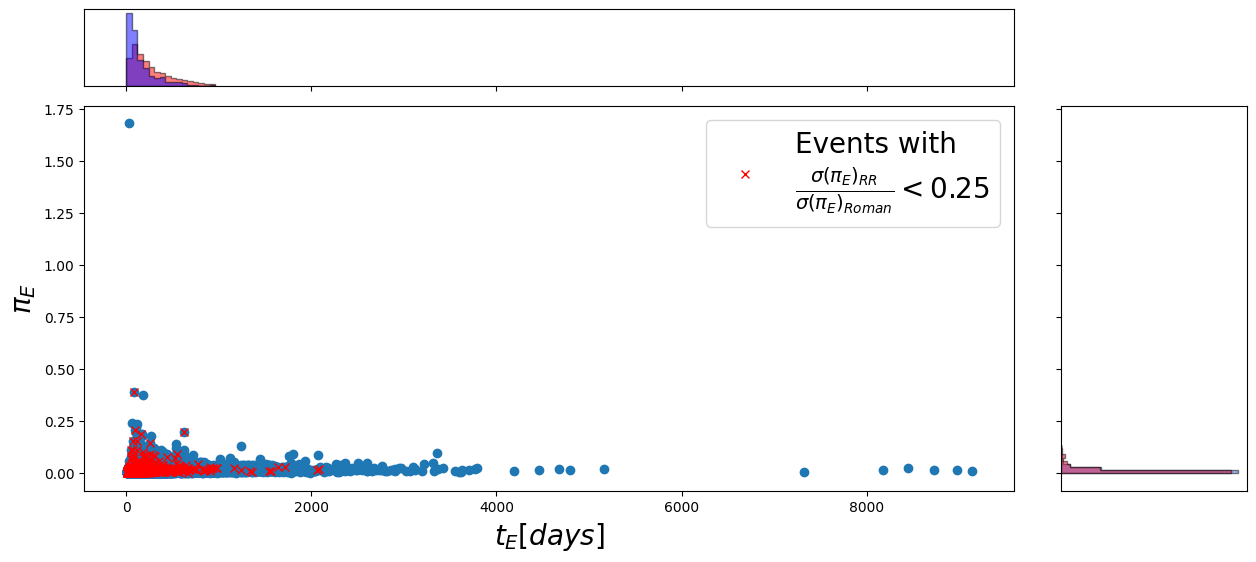

In [8]:
labelsparams = lambda p: labels[p]

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'

label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
fig, ax = plt.subplots(1, 1, figsize = (12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['te'],true['piE'],marker='o',ls='')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])],marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(\pi_E)_{RR}}{\sigma(\pi_E)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$t_E [days]$',fontsize=20)
ax.set_ylabel(r'$\pi_E$',fontsize=20)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1
ax_histx.hist(true['te'], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
ax_histx.hist(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='blue')

ax_histy.hist(true['piE'], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

#ax_histy.set_xscale("log")
# Remove ticks from inset histograms
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


In [9]:
%matplotlib inline
plt.close("all")
def plot_histogram(ax, data, p, colors, some_flag=False):
    # print(data)
    sources = data['Source'].values
    data = data[p]   
    lab_latex = {'te':'tE(days)','rho':'\\rho' ,'piE':'\pi_E','q':'q'}
    data_label = lab_latex[p]
    lab_latex_legend = {'te':'t_E','rho':'\\rho','piE':'\pi_E','q':'q'}
    xlabel=r'$log_{10}'+f"[{lab_latex[p]}]$"
    
    masks_rr = lambda p, label: [
        (met_1_rr[p][met_1_rr['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_rr[p][met_2_rr['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_rr[p][met_3_rr['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    masks_roman = lambda p, label:[
        (met_1_roman[p][met_1_roman['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_roman[p][met_2_roman['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_roman[p][met_3_roman['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    
    if some_flag:
        masks = masks_roman(p,lab_latex_legend[p])
        dataset = 'Roman'
        met_1 = met_1_roman[met_1_roman['Source'].isin(sources)]
        met_2 = met_2_roman[met_2_roman['Source'].isin(sources)]
        met_3 = met_3_roman[met_3_roman['Source'].isin(sources)]
    else:
        masks = masks_rr(p,lab_latex_legend[p])
        dataset = 'Roman and Rubin'
        met_1 = met_1_rr[met_1_rr['Source'].isin(sources)]
        met_2 = met_2_rr[met_2_rr['Source'].isin(sources)]
        met_3 = met_3_rr[met_3_rr['Source'].isin(sources)]

    # Plot the histogram of the true values
    ax.hist(np.log10(data), bins=30, color='royalblue', alpha=0.5, label=f'True value of ${lab_latex_legend[p]}$')
    
    # Iterate over the masks and plot the masked data
    for (mask, color, label) in masks:
        # Select the masked data based on the condition in the mask
        # print(label)
        masked_data = data[mask]
        ax.hist(np.log10(masked_data), 
                bins=30, histtype='step', color=color, lw=2, label=label)
    
    # Set labels and title
    # print(xlabel)
    ax.set_xlabel(xlabel, fontsize=20)
    

    ax.set_title('Percentage of events with:\n'+
                 f"$\\alpha({lab_latex_legend[p]})<0.25: $"+
                 f"{round(100*len(met_1[p][met_1[p]<0.25])/len(data),2)}%, "+'\n'+
                 f"$\\beta({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_2[p][met_2[p]<0.25])/len(data),1)}%, "+'\n'+
                 f"$\\gamma({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_3[p][met_3[p]<0.25])/len(data),2)}%",fontsize=15)
    
    ax.legend(fontsize=10)
    # ax.set_xticks([1,2,3,4],fontsize=12)
    
    ax.grid()
    

In [10]:
# mask_true

In [11]:
# len(set(fit_rr['Source'][fit_rr['p_value']>0.05]).intersection(set(fit_roman['Source'][fit_roman['p_value']>0.05])))

/tmp/ipykernel_10435/1282968447.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()# Adjust the layout to avoid overlapping


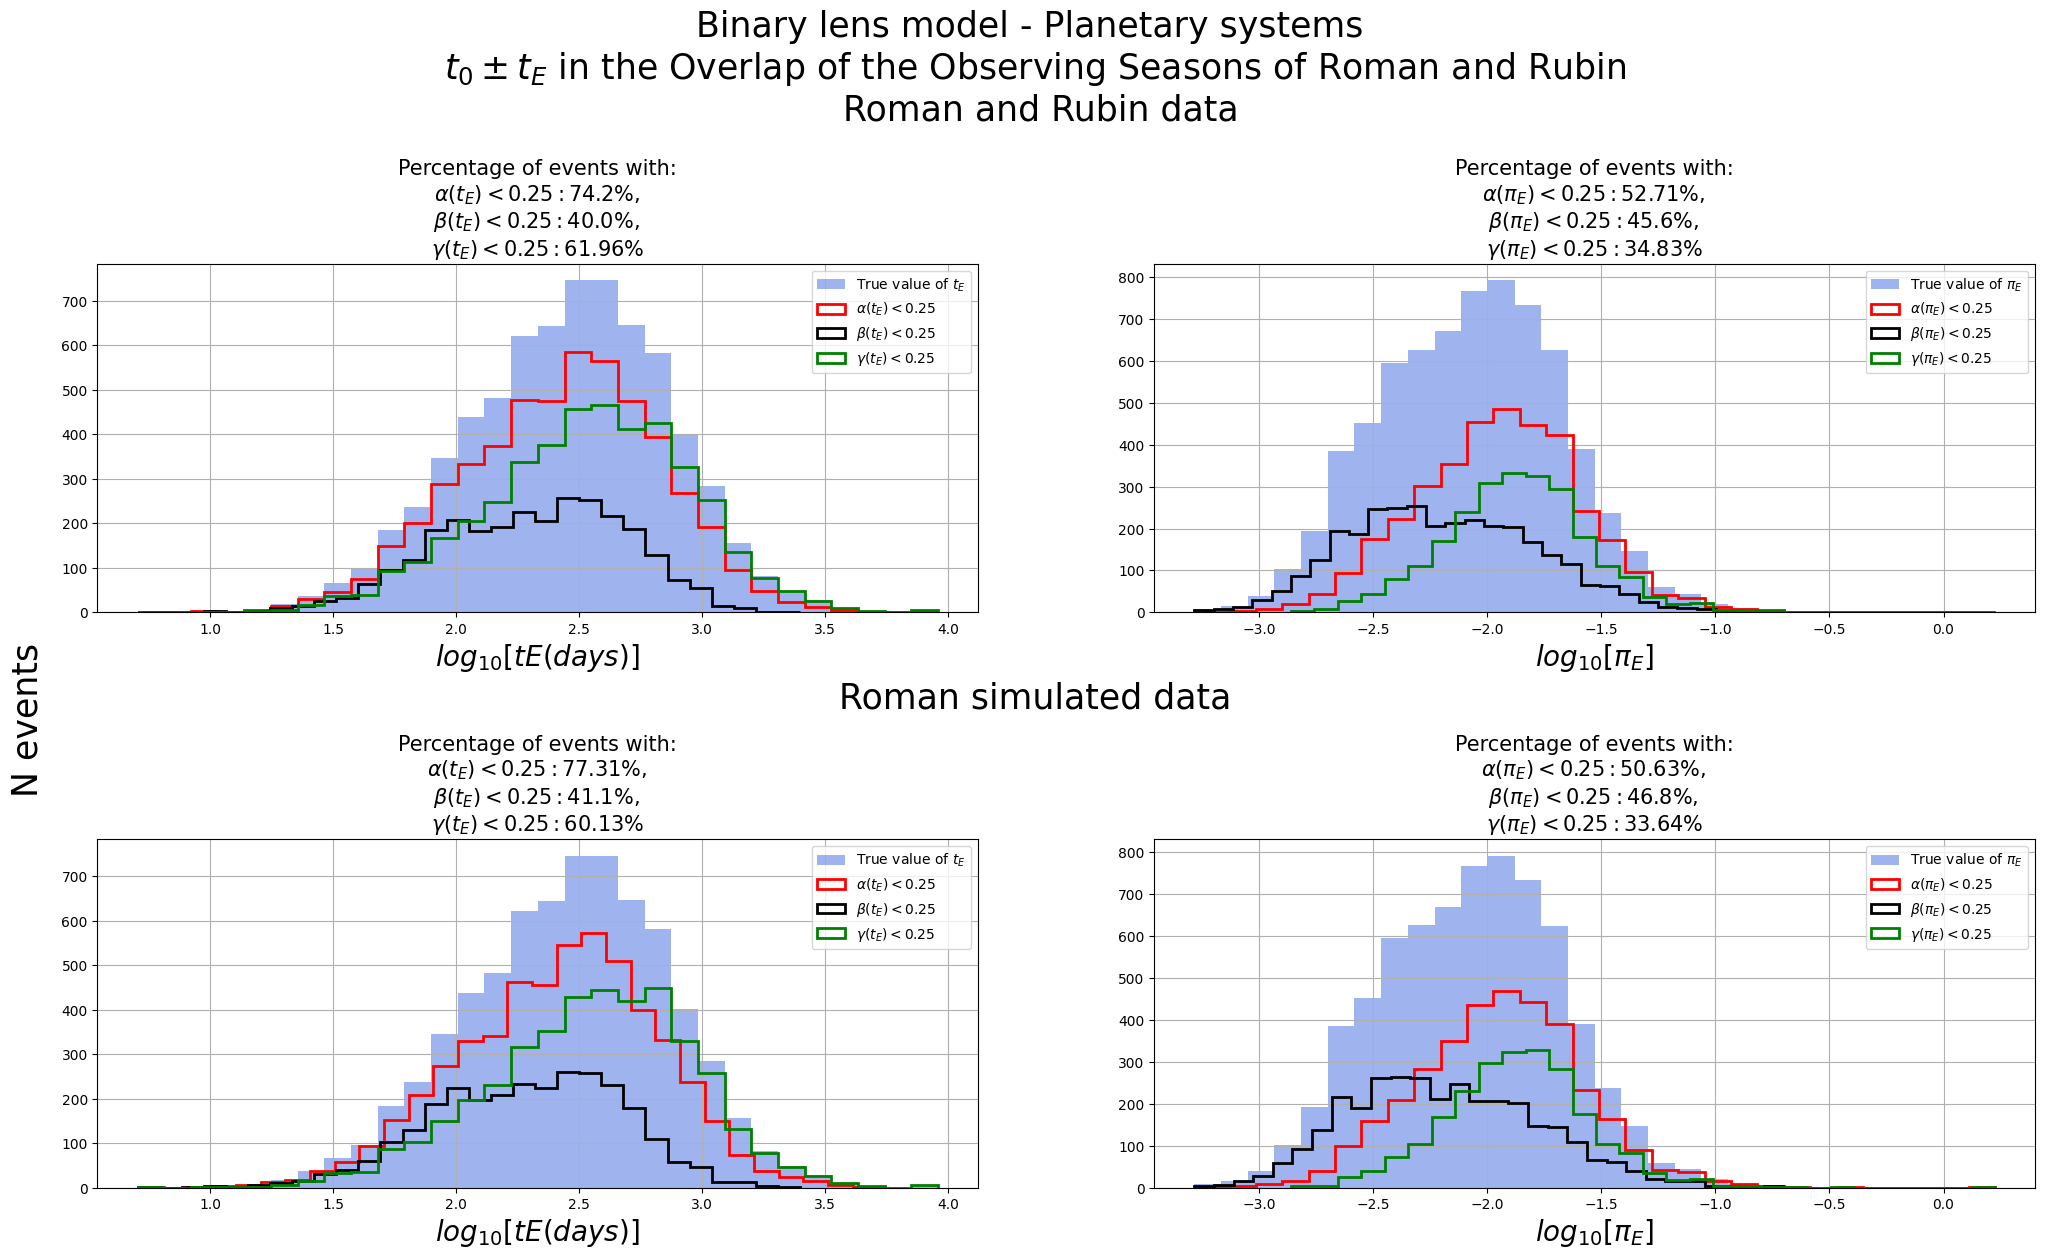

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(25, 12), gridspec_kw={'hspace': 0.65})
cat = 'A'
mask = (true["categories"] == cat) #& (true['Source'].isin(fit_rr['Source'][fit_rr['p_value']>0.05].values))
# mask = np.ones(len(true),dtype=bool)

true_df=true[mask]
# display(true_df)
# print(fit_rr['p_value'][fit_rr['Source']==5035])
# Plotting histograms

p = 'te'
plot_histogram(axes[0, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
# p = 'rho'
# plot_histogram(axes[0, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
# plot_histogram(axes[1, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'piE'
plot_histogram(axes[0, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
# p = 'q'
# plot_histogram(axes[0, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
# plot_histogram(axes[1, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}
# Add titles for each row
fig.text(0.5, 1, 'Binary lens model - Planetary systems \n$t_0 \pm t_E$ in the '+ cats_label[cat]+'\n Roman and Rubin data', ha='center', fontsize=25)
fig.text(0.5, 0.51, 'Roman simulated data', ha='center', fontsize=25)
# Add common Y label
fig.text(0.1-0.01, 0.5, 'N events', va='center', rotation='vertical', fontsize=25)
plt.tight_layout()# Adjust the layout to avoid overlapping


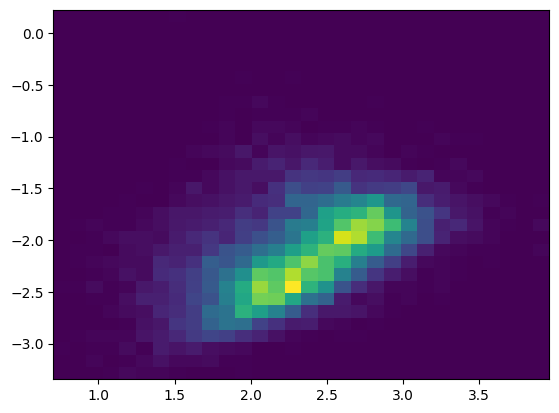

In [13]:
plt.hist2d(np.log10(true['te']),np.log10(true['piE']),bins=30)
plt.show()

In [14]:
true

,Source,t0,u0,te,piEN,piEE,piE,categories
0,5000,2.462066e+06,2.719437,992.770661,0.029792,-0.019632,0.035678,A
1,5003,2.462398e+06,0.104792,194.921706,0.033302,0.019179,0.038430,A
2,5004,2.463037e+06,0.180753,156.664463,0.002227,-0.003124,0.003836,A
3,5009,2.462823e+06,1.755176,725.173751,0.020162,-0.002142,0.020276,A
4,5010,2.462160e+06,1.115926,151.602495,0.013249,0.021085,0.024902,B
...,...,...,...,...,...,...,...,...
8838,24982,2.462391e+06,2.991550,412.150442,0.012643,0.008982,0.015508,A
8839,24983,2.462176e+06,1.565307,103.875217,0.001119,-0.007049,0.007137,B
8840,24987,2.462931e+06,2.958216,260.898532,0.001946,0.000475,0.002003,A
8841,24990,2.462715e+06,0.031343,2434.191450,0.011737,0.007106,0.013721,A


In [15]:
labelsparams = lambda p: labels[p]

label_m1 = lambda p: f'$\\alpha({labels[p]})$'
label_m3 = lambda p :f'$\\gamma({labels[p]})$'
label_m2 = lambda p :f'$\\beta({labels[p]})$'
# cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}

# cats_labels = {'A': 'Overlap seasons Roman and Rubin', 'B': 'Roman gap and Rubin season','C': 'gap Roman and gap Rubin', 'D': 'Season Roman and gap Rubin'}
# Function to plot histograms and annotations
def plot_histogram(ax, data1, data2, xlabel, title, limit):
    # ax.set_title(title)
    ax.hist(data1, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman+Rubin')
    ax.hist(data2, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman')
    ax.set_xlabel(xlabel, fontsize=20)
    # limit = 0.1
    ax.axvline(limit, color='red', linestyle='--')
    ax.legend(loc='best')
    
    fraction_data1 = len(data1[data1 < limit]) / len(data1)
    fraction_data2 = len(data2[data2 < limit]) / len(data2)
    
    ax.annotate(f'Fraction of events Roman+Rubin\nwith {xlabel}<{str(limit)} = {fraction_data1:.2f}', 
                xy=(0.5, -0.3), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)
    ax.annotate(f'Fraction of events Roman\nwith {xlabel}<{str(limit)} = {fraction_data2:.2f}', 
                xy=(0.5, -0.45), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)


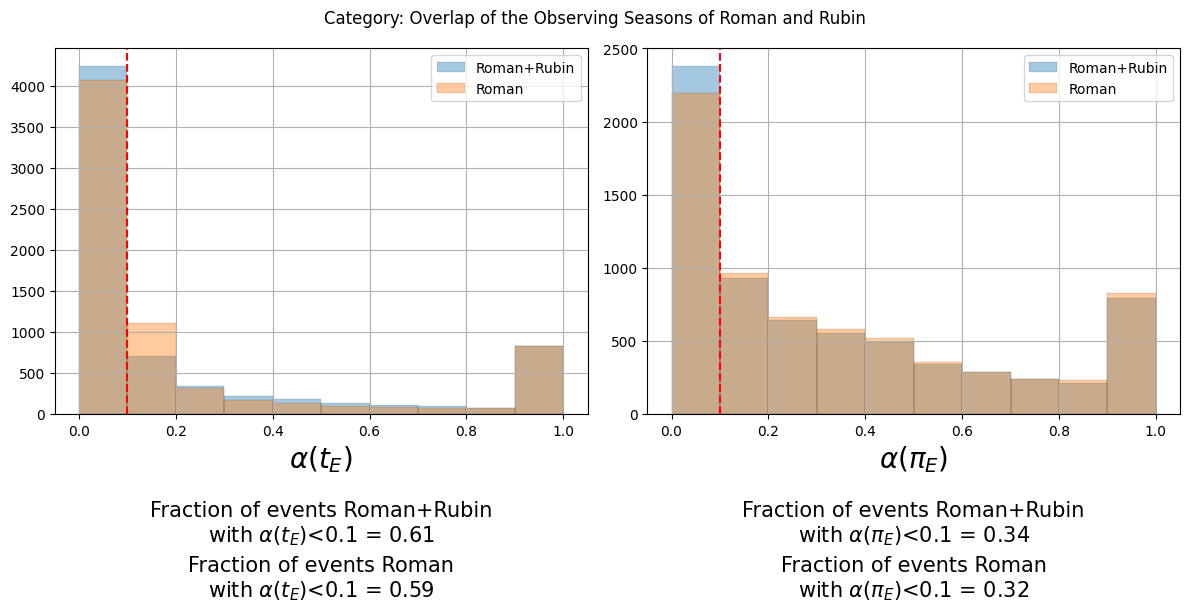

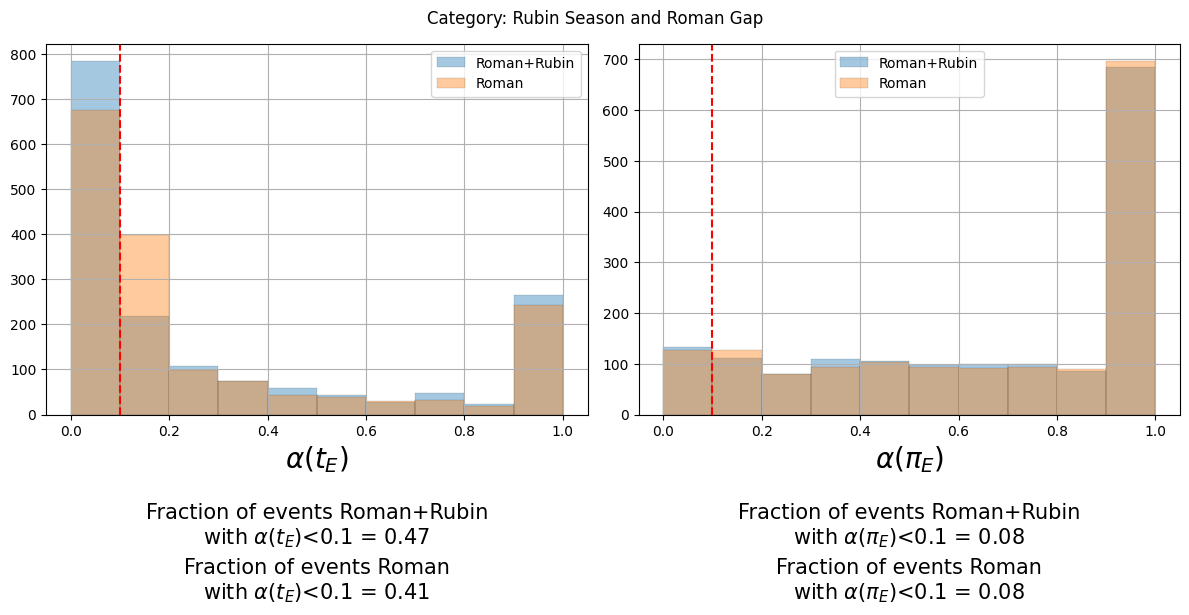

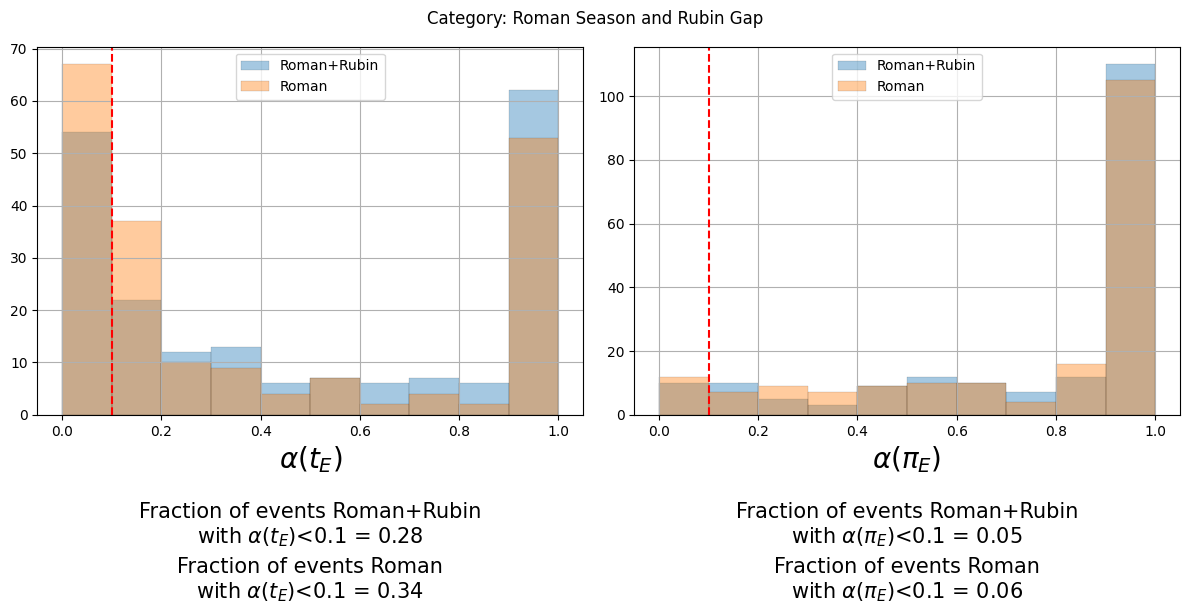

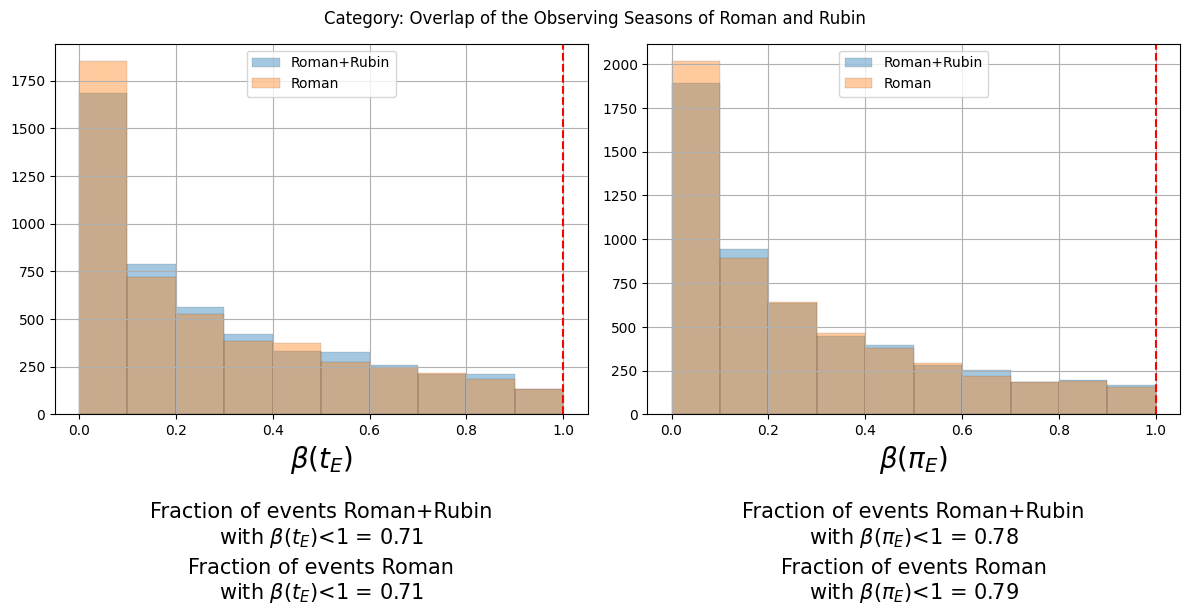

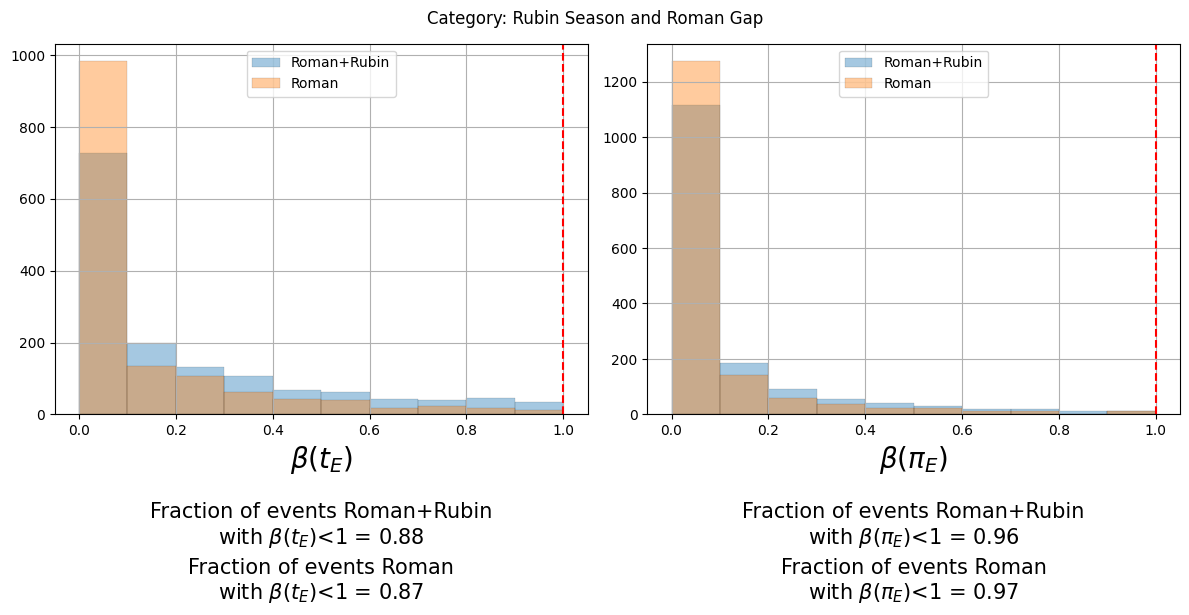

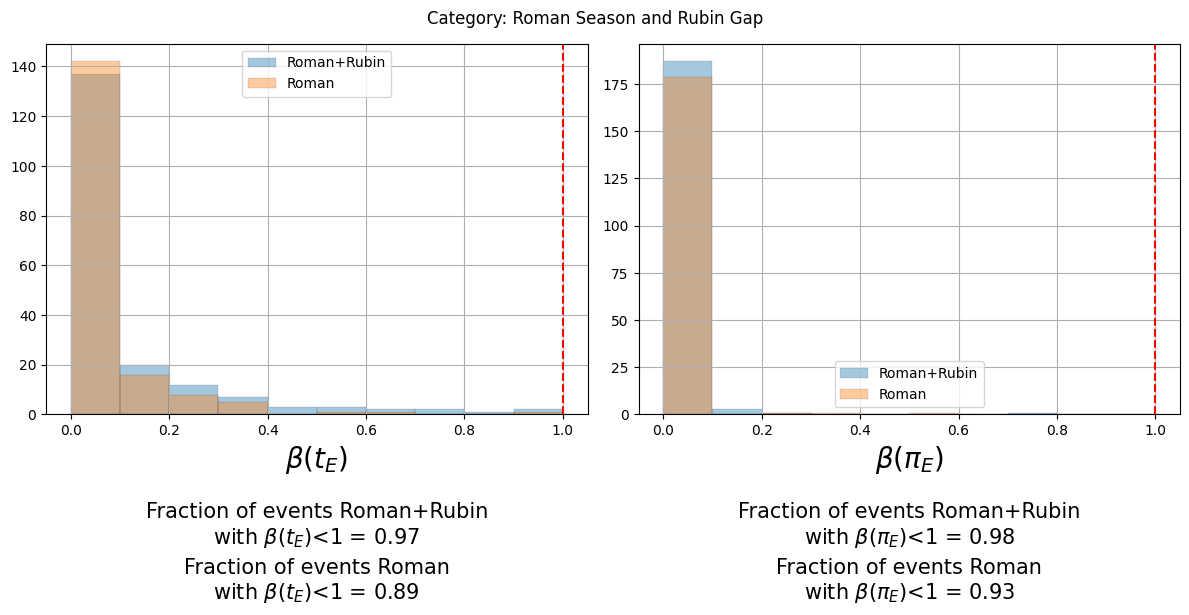

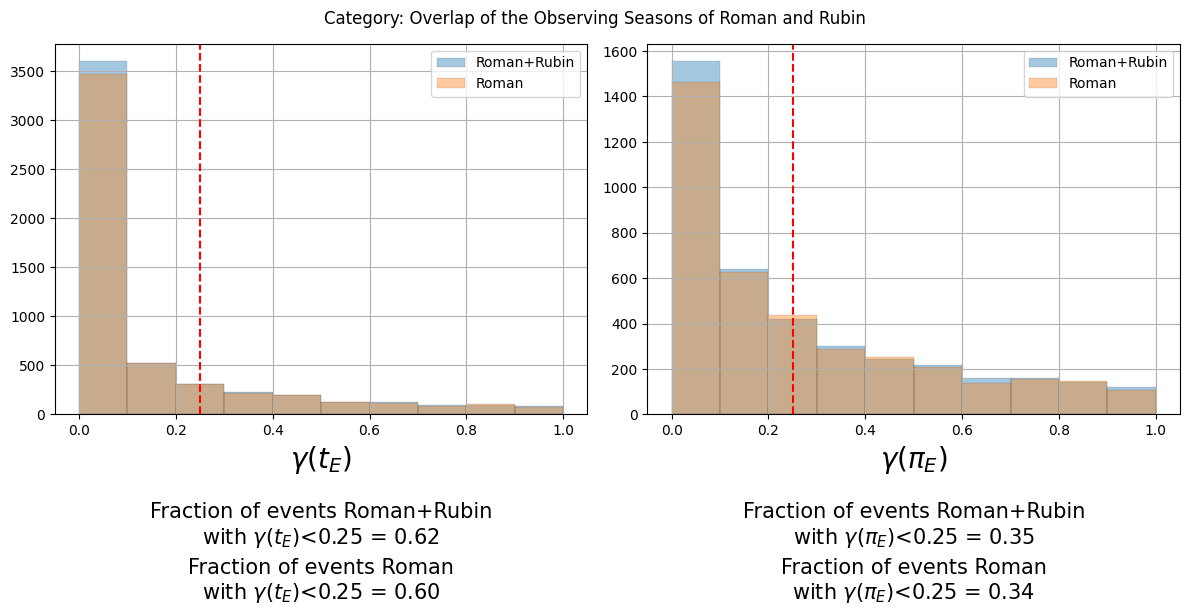

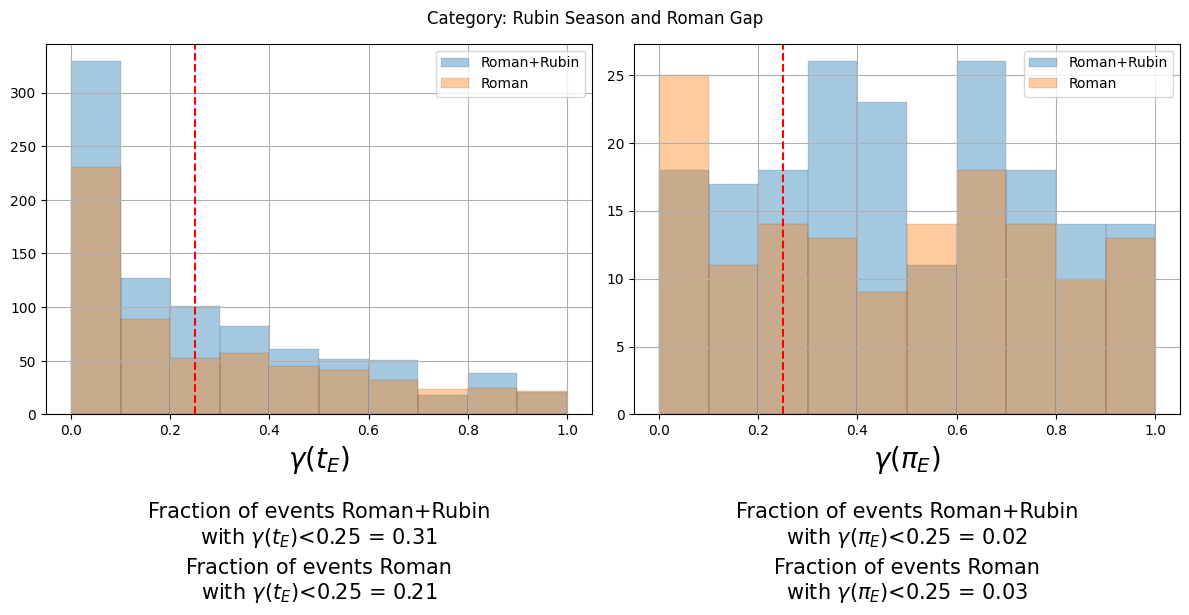

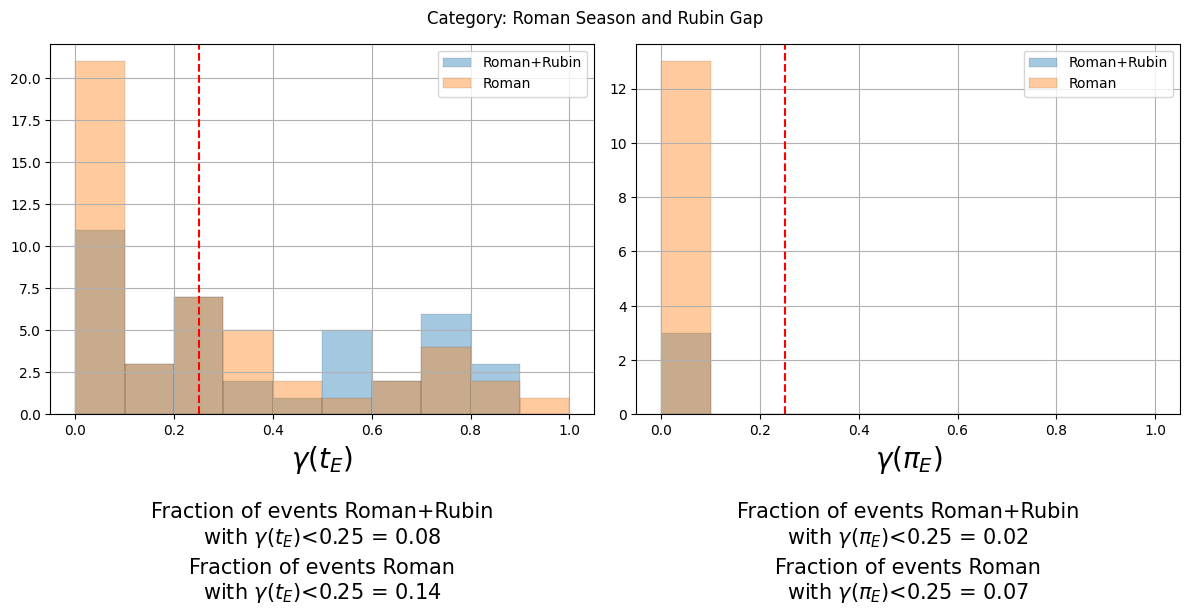

In [16]:
# Define the categories, datasets, and label functions to iterate over
categories = ['A', 'B', 'C']
datasets = [(met_1_rr, met_1_roman), (met_2_rr, met_2_roman), (met_3_rr, met_3_roman)]
label_functions = [label_m1, label_m2, label_m3]  # Corresponding label functions for each dataset

# Define the limit values for each label function
limits = {label_m1: 0.1, label_m2: 1, label_m3: 0.25}

# Parameters for the histograms
params = [('te', r'$t_E$'), ('piE', r'$\pi_E$')]

# Loop through the datasets and categories
for i, (rr, roman) in enumerate(datasets):
    label_func = label_functions[i]  # Dynamically choose the correct label function
    limit = limits[label_func]  # Set the limit based on the label function
    
    for cat in categories:
        fig, axes = plt.subplots(1, 2, figsize=(12, 7))

        # Add a title for the figure
        plt.suptitle(f'Category: {cats_label[cat]}')# (Dataset {i+1})')

        # Filter based on the category
        mask = rr['Source'].isin(true['Source'][true['categories'] == cat])

        # Loop through the parameters for each axis
        for j, (p, label) in enumerate(params):
            plot_histogram(axes[j], rr[p][mask], roman[p][mask], label_func(p), label, limit)

        # Add grids and adjust the layout
        axes[0].grid()
        axes[1].grid()
        plt.tight_layout()

        # Show the plot
        plt.show()


In [17]:
print(len(true[true['categories']=='A']))
print(len(true[true['categories']=='B']))
print(len(true[true['categories']=='C']))
print(len(true[true['categories']=='D']))

6927
1652
195
69


Text(0, 0.5, 'Frequency')

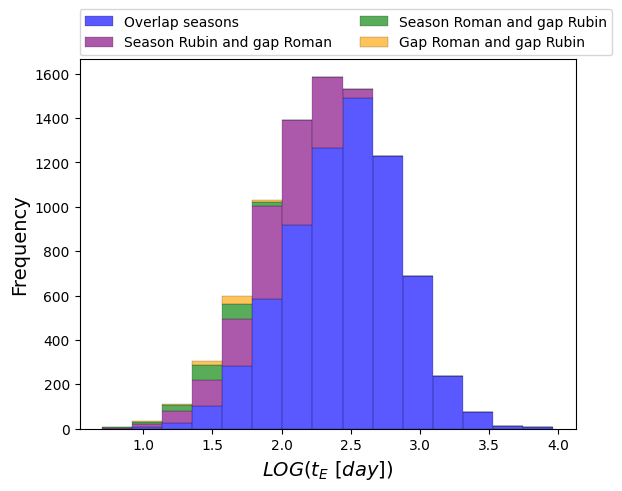

In [18]:
s1 = true['te'][true['categories']=='A']
s2 = true['te'][true['categories']=='B']
s3 = true['te'][true['categories']=='C']
s4 = true['te'][true['categories']=='D']
plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.legend(loc=(0,1.01),ncols=2)
plt.xlabel('$LOG(t_E \ [day])$',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
# plt.yscale("log")

In [19]:
np.log10(1)

0.0

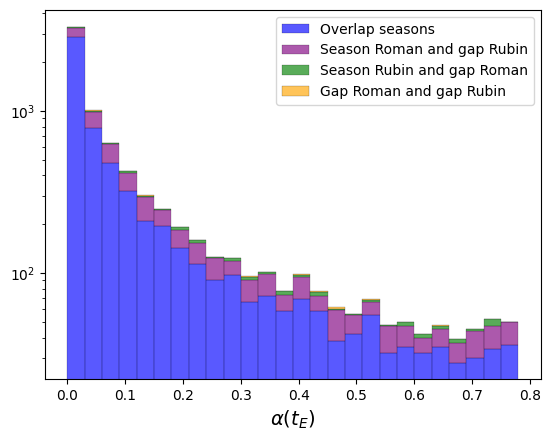

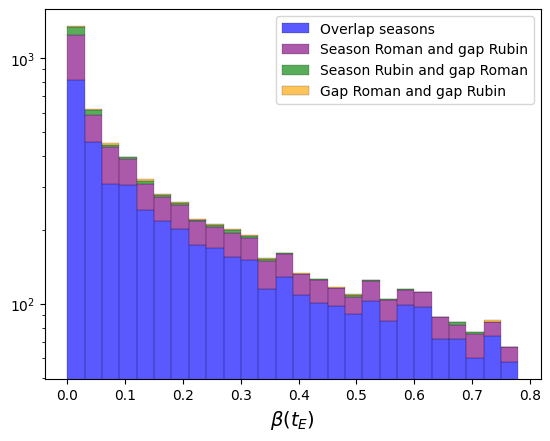

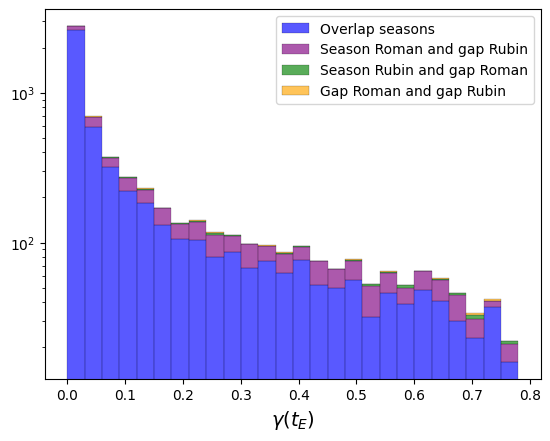

In [20]:
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\alpha(t_E)$',fontsize=14)
plt.show()
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2, 
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\beta(t_E)$',fontsize=14)
plt.show()
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, edgecolor='k',lw=0.2,  
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\gamma(t_E)$',fontsize=14)
plt.show()


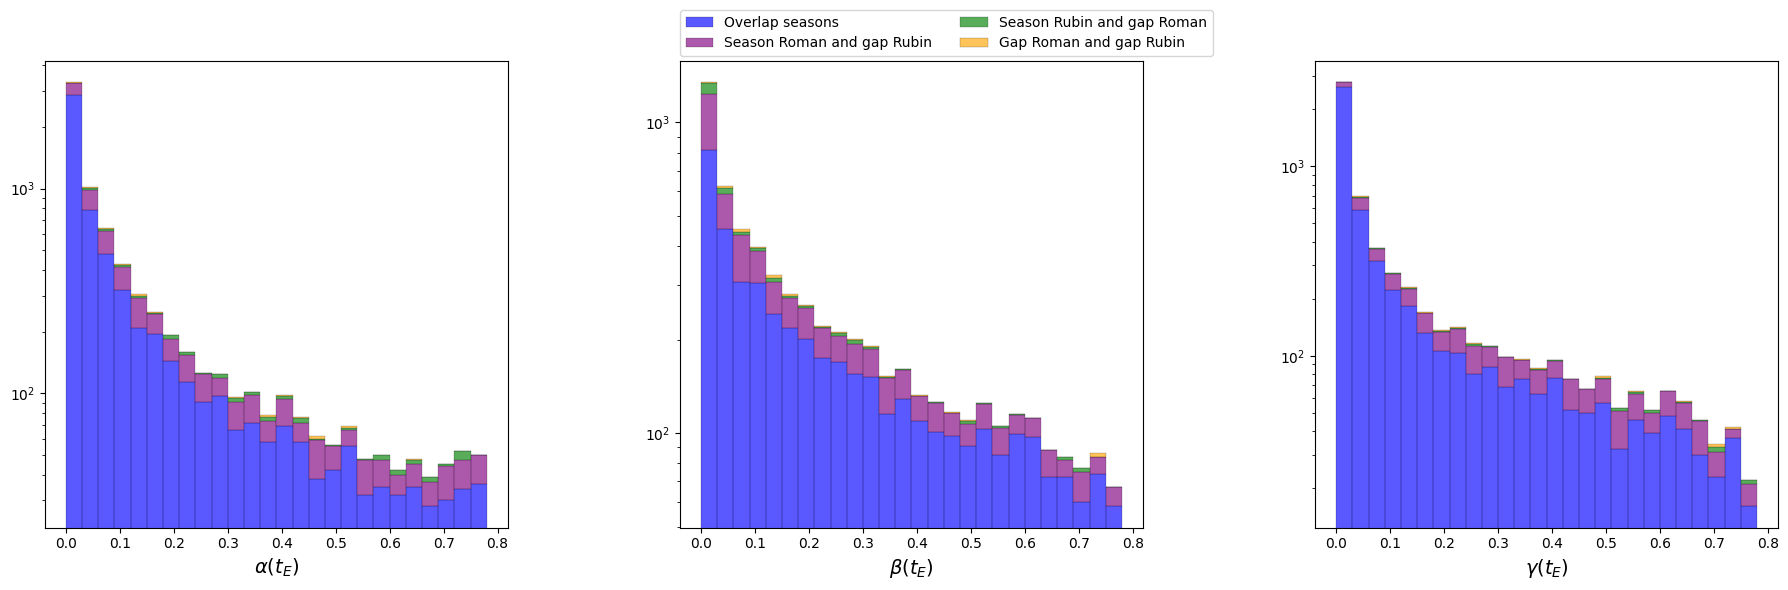

In [21]:
## import matplotlib.pyplot as plt
import numpy as np

# Create a 1x3 grid for three histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First histogram for alpha(t_E)
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[0].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[0].set_yscale("log")
# axes[0].legend(loc=(0,1.01),ncols=2)
axes[0].set_xlabel('$\\alpha(t_E)$', fontsize=14)

# Second histogram for beta(t_E)
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[1].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[1].set_yscale("log")
axes[1].legend(loc=(0,1.01),ncols=2)
axes[1].set_xlabel('$\\beta(t_E)$', fontsize=14)

# Third histogram for gamma(t_E)
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[2].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[2].set_yscale("log")
# axes[2].legend(loc=(0,1.01),ncols=2)
axes[2].set_xlabel('$\\gamma(t_E)$', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
import scipy.stats as stats
from tqdm.auto import tqdm
# Given values
# chi2_reduced = 1.2  # chi^2 / DOF
def p_value_to_df(fit_rr):
    '''
    Compute the p-value for each fit
    
    '''
    p_value_dict = {}
    for i in tqdm(range(len(fit_rr))):
        dof = fit_rr['dof'].iloc[i]
        # Compute chi^2
        chi2 = fit_rr['chi2'].iloc[i]
        # Compute the p-value
        p_value = stats.chi2.sf(chi2, dof)
        p_value_dict[fit_rr['Source'].iloc[i]] = p_value
        fit_rr['p_value'] = fit_rr['Source'].map(p_value_dict)
    return fit_rr
fit_rr = p_value_to_df(fit_rr)
fit_roman = p_value_to_df(fit_roman)
# print(fit_rr)

  0%|          | 0/8843 [00:00<?, ?it/s]

  0%|          | 0/8843 [00:00<?, ?it/s]

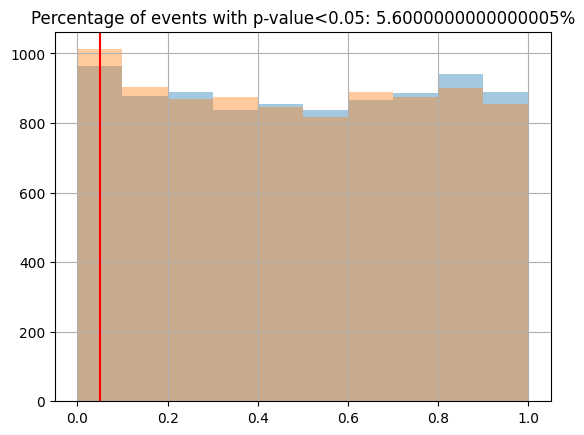

In [23]:
plt.hist(fit_rr['p_value'], alpha=0.4)
plt.hist(fit_roman['p_value'], alpha=0.4)
plt.axvline(0.05,color='red')
plt.title('Percentage of events with p-value<0.05: '+str(100*round(len(fit_rr['p_value'][fit_rr['p_value']<0.05])/len(fit_rr['p_value']),3))+'%')
plt.grid()
plt.show()


In [24]:
fit_rr.head()

,Source,t0,u0,te,piEN,piEE,t0_err,u0_err,te_err,piEN_err,piEE_err,chi2,dof,cov_piEE_piEN,piE,piE_err,p_value
0,5000,2.462076e+06,2.465736,1165.051409,1.967188e-02,-3.309849e-23,174.333848,0.909936,47.836408,0.013460,0.018348,41932.439946,41813,-2.065072e-04,0.019672,0.013460,0.339093
1,5003,2.462398e+06,0.104095,195.921096,3.142323e-02,1.844563e-02,0.107770,0.001047,0.931383,0.002574,0.000418,42749.221936,42398,4.580254e-07,0.036437,0.002230,0.114082
2,5004,2.463036e+06,0.182796,155.302794,8.320769e-04,-6.247216e-03,1.236404,0.013313,5.056005,0.011796,0.004451,42368.560363,41641,1.817779e-05,0.006302,0.004679,0.006056
3,5009,2.462828e+06,1.475127,837.378026,1.777896e-02,-3.533122e-03,3.117331,0.009726,13.052606,0.000232,0.001290,42630.176097,42398,1.336570e-07,0.018127,0.000339,0.212391
4,5010,2.462165e+06,1.202871,145.865981,5.389563e-17,2.277377e-02,4.614211,0.255858,17.386665,0.012100,0.004691,42625.217300,42396,1.823995e-05,0.022774,0.004691,0.215335


In [25]:
# !pip install corner


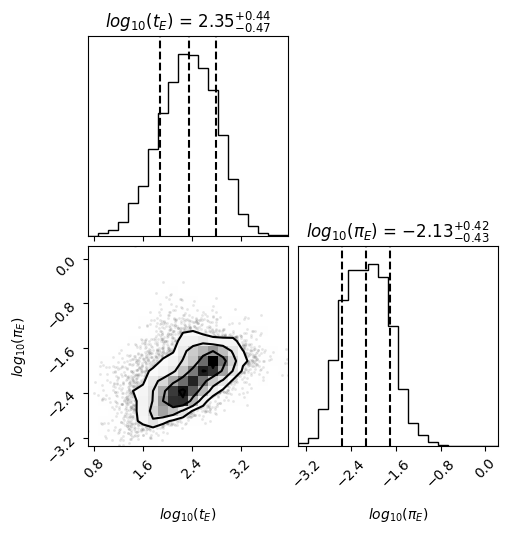

In [26]:
import numpy as np
import corner
import matplotlib.pyplot as plt

x = true['te']
# y = true['rho']
z = true['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\pi_E)$"], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# Show the plot
plt.show()


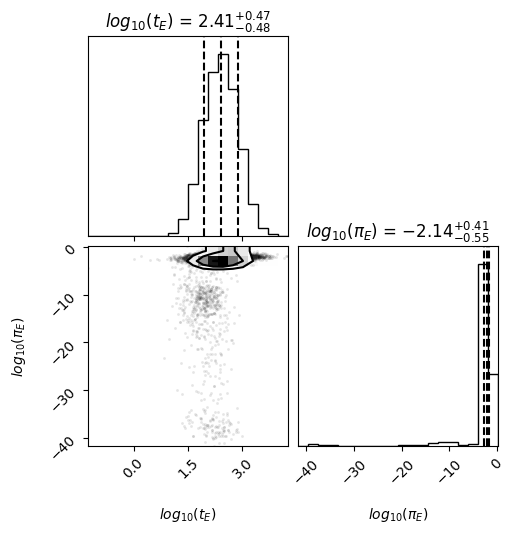

In [27]:
import numpy as np
import corner
import matplotlib.pyplot as plt

x = fit_rr['te']
# y = fit_rr['rho']
z = fit_rr['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\pi_E)$"], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# Show the plot
plt.show()


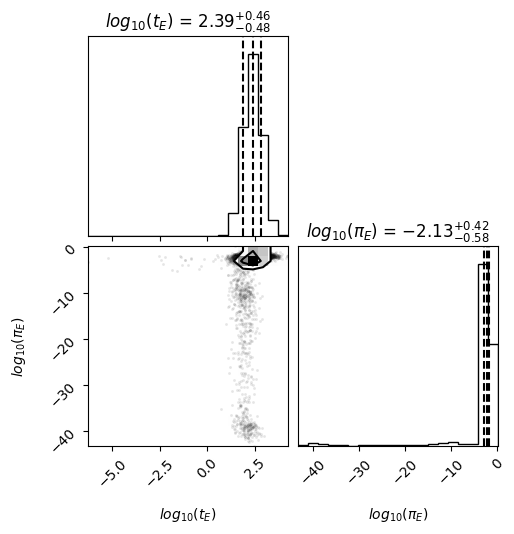

In [28]:
import numpy as np
import corner
import matplotlib.pyplot as plt

x = fit_roman['te']
# y = fit_roman['rho']
z = fit_roman['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\pi_E)$"], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# Show the plot
plt.show()


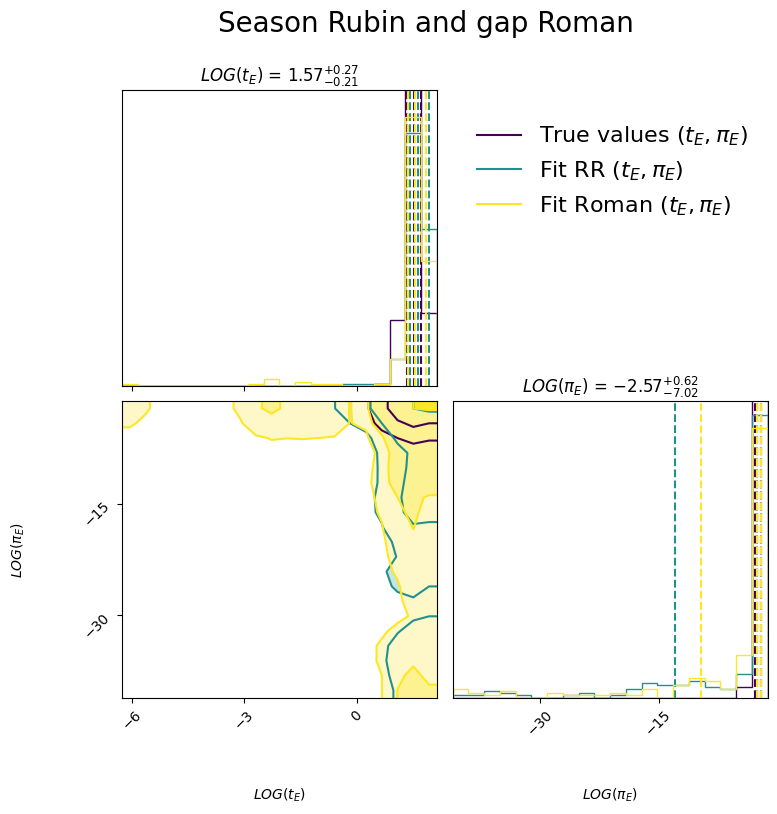

In [29]:
# -*- coding: utf-8 -*-
"""Demo to overlay multiple corners with predefined samples, handling non-finite values."""
import corner
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

# Corner plot settings
# CORNER_KWARGS = dict(
#     smooth=0.9,
#     label_kwargs=dict(fontsize=16),
#     title_kwargs=dict(fontsize=12),
#     quantiles=[0.16, 0.84],
#     levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
#     plot_density=False,
#     plot_datapoints=False,
#     fill_contours=True,
#     show_titles=True,
#     max_n_ticks=3,
# )
# Corner plot settings with corrected quantiles
CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=12),
    quantiles=[0.16, 0.5, 0.84],  # Added median (0.5) to make it length-3
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=True,
    max_n_ticks=3,
)


def remove_nonfinite_values(arrays):
    """Remove non-finite (NaN, inf) values from a list of arrays."""
    cleaned_arrays = []
    for array in arrays:
        finite_mask = np.isfinite(array)
        cleaned_arrays.append(array[finite_mask])
    return cleaned_arrays

def overlaid_corner(samples_list, sample_labels, axis_labels):
    """Plots multiple corner plots on top of each other with axis labels."""
    
    category_title = {'A':'Overlap seasons', 'B':'Season Roman and gap Rubin', 'C':'Season Rubin and gap Roman', 'D':'Gap Roman and gap Rubin'}
    # Get constants for plotting
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.colormaps['viridis']  # Updated for Matplotlib 3.7+
    colors = [cmap(i / (n - 1)) for i in range(n)]  # Generate distinct colors

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range, labels=axis_labels, label_kwargs=dict(labelpad=15))  # Add label padding

    # Create the first corner plot with better figure size control
    fig = plt.figure(figsize=(8, 8))  # Slightly larger for better label management
    corner.corner(
        samples_list[0],
        fig=fig,
        color=colors[0],
        **CORNER_KWARGS
    )

    # Overlay other samples
    for idx in range(1, n):
        corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    # Adjust spacing between plots and fix label overlap
    plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0.12, bottom=0.12, top=0.88)

    # Add suptitle with some space from the top
    plt.suptitle(category_title[cat], fontsize=20)

    # Create the legend
    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=16, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )

    # Save the plot and show it
    # plt.savefig("corner.png")
    plt.show()

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    """Compute normalization weights to balance the appearance of different sample sizes."""
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

def main():
    # Suppose you have the following predefined arrays:
    cat='C'
    x1 = np.log10(true['te'][true['categories']==cat])
    # x2 = np.log10(true['rho'][true['categories']==cat])
    x3 = np.log10(true['piE'][true['categories']==cat])

    MASK = fit_rr['Source'].isin(true['Source'][true['categories']==cat].values)
    y1 = np.log10(fit_rr['te'][MASK])
    # y2 = np.log10(fit_rr['rho'][MASK])
    y3 = np.log10(fit_rr['piE'][MASK])

    z1 = np.log10(fit_roman['te'][MASK])
    # z2 = np.log10(fit_roman['rho'][MASK])
    z3 = np.log10(fit_roman['piE'][MASK])

    # Remove non-finite values from the arrays
    x1,  x3 = remove_nonfinite_values([x1, x3])
    y1,  y3 = remove_nonfinite_values([y1,  y3])
    z1,  z3 = remove_nonfinite_values([z1,  z3])

    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x3]).T
    samples2 = np.vstack([y1,  y3]).T
    samples3 = np.vstack([z1,  z3]).T

    # Overlaid corner plot of the three samples
    # overlaid_corner(
    #     [samples1, samples2, samples3],  # List of 3D samples
    #     ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$",
    #      "Fit Roman $(t_E, \\rho, \\pi_E)$"]  # Labels
    # )
    overlaid_corner(
    [samples1, samples2, samples3],  # List of 3D samples
    ["True values $(t_E, \\pi_E)$", "Fit RR $(t_E,  \\pi_E)$", "Fit Roman $(t_E,  \\pi_E)$"],  # Labels
    ["$LOG(t_E)$", "$LOG(\\pi_E)$"]  # Axis labels
    )

if __name__ == "__main__":
    main()



In [30]:
len(true[true['categories']=='C'])

195

In [31]:
# fit_rr['Source'].isin(true['Source'][true['categories']=='A'].values)

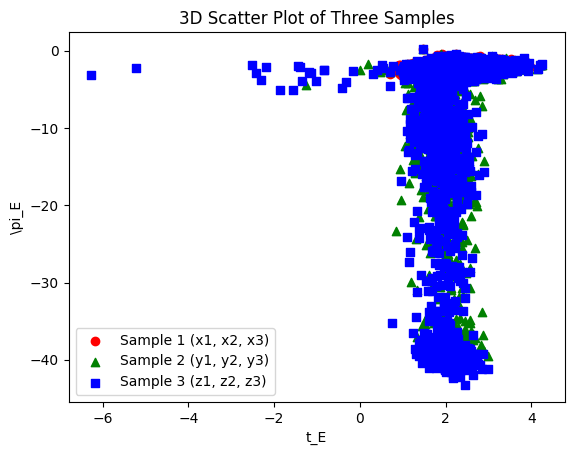

In [32]:
# -*- coding: utf-8 -*-
"""3D scatter plot of three samples with different colors."""
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_samples(samples1, samples2, samples3):
    """Plot 3D scatter plot for the three different samples."""
    fig = plt.figure()
    ax = fig.add_subplot()#111, projection='3d')

    # Plot each sample in 3D space with different colors
    ax.scatter(samples1[:, 0], samples1[:, 1], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
    ax.scatter(samples2[:, 0], samples2[:, 1], c='g', label='Sample 2 (y1, y2, y3)', marker='^')
    ax.scatter(samples3[:, 0], samples3[:, 1], c='b', label='Sample 3 (z1, z2, z3)', marker='s')

    # Set labels and title
    ax.set_xlabel('t_E')
    ax.set_ylabel('\\pi_E')
    # ax.set_zlabel('Dimension 3')
    ax.set_title('3D Scatter Plot of Three Samples')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

def main():
    # Suppose you have the following predefined arrays:


    
    y1 = np.log10(fit_rr['te'])
    # y2 = np.log10(fit_rr['rho'])
    y3 = np.log10(fit_rr['piE'])

    z1 = np.log10(fit_roman['te'])
    # z2 = np.log10(fit_roman['rho'])
    z3 = np.log10(fit_roman['piE'])
    
    x1 = np.log10(true['te'])
    # x2 = np.log10(true['rho'])
    x3 = np.log10(true['piE'])
    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1,  x3]).T
    samples2 = np.vstack([y1,  y3]).T
    samples3 = np.vstack([z1,  z3]).T

    # Plot the samples in 3D space
    plot_3d_samples(samples1, samples2, samples3)

if __name__ == "__main__":
    main()


/home/anibal/anaconda3/envs/pyLIMApip/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


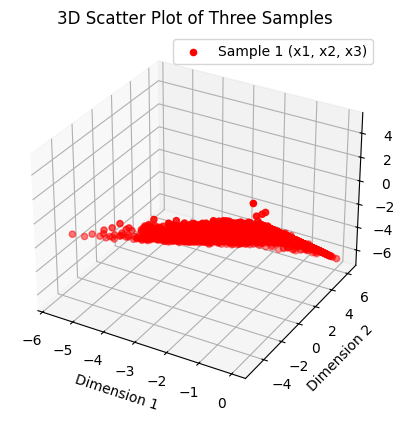

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.log10(met_1_rr['te'])
x2 = np.log10(met_2_rr['te'])
x3 = np.log10(met_3_rr['te'])
samples1 = np.vstack([x1, x2, x3]).T
# Plot each sample in 3D space with different colors
ax.scatter(samples1[:, 0], samples1[:, 1], samples1[:, 2], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Scatter Plot of Three Samples')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [34]:
1+1

2